# LSTM with no 0 class and holdig out 2 subjects

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras import losses
from keras.models import Sequential
from keras.layers import (Dense, Embedding, Reshape, Activation, 
                          SimpleRNN, LSTM, Convolution1D, 
                          MaxPooling1D, Dropout, Bidirectional)
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
col = []
for ea_ideal in range(1,18):
    exec(f"df_subj_ideal_{ea_ideal} = pd.read_csv('/content/drive/My Drive/realistic_sensor_displacement/subject{ea_ideal}_ideal.log', sep='\t', names = range(120))")
    col.append(ea_ideal)

In [5]:
col

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [0]:
# rowNum = 0
# rowNum += df_subj_ideal_17.shape[0]
# rowNum

In [0]:
# rowNum = 0
# for i in col:
#   rowNum += vars()[f"df_subj_ideal_{i}.shape[0]"]
# print(rowNum)

In [0]:
subj_num_ls = [df_subj_ideal_1,df_subj_ideal_2,df_subj_ideal_3,df_subj_ideal_4,df_subj_ideal_5,
              df_subj_ideal_6,df_subj_ideal_7,df_subj_ideal_8,df_subj_ideal_9,df_subj_ideal_10,
              df_subj_ideal_11,df_subj_ideal_12,df_subj_ideal_13,df_subj_ideal_14,df_subj_ideal_15,
              df_subj_ideal_16,df_subj_ideal_17]

In [0]:
ls_of_dfs = []
for num in range(1,18):
    for activity in subj_num_ls[num-1][119].unique():
        ls_of_dfs.append(f"df_idealSubj{num}_{activity}")

In [10]:
ls_of_dfs[:5]

['df_idealSubj1_0',
 'df_idealSubj1_1',
 'df_idealSubj1_2',
 'df_idealSubj1_3',
 'df_idealSubj1_4']

## Without 0 class and 2 subjects

In [0]:
#find 2 subjects to hold out for test and val

In [0]:
def findSubjectNumberOfActivities(subjNumber=1):
  return len(subj_num_ls[subjNumber-1][119].unique())

In [13]:
#subject 1 and 9 are good holdouts b/c they did every activity
findSubjectNumberOfActivities(14)

34

In [14]:
#17 subjects did all activities
counter = 0
for i in range(1,18):
  if findSubjectNumberOfActivities(8) == 34:
    counter += 1
print(counter)

17


In [0]:
ls_of_dfs_noZero = []
for num in range(1,18):
  
  if num == 1 or num == 9 or num == 10 or num == 14:
    continue
    
  for activity in subj_num_ls[num-1][119].unique():
      
    if activity == 0:    #skip 0 activity (no activity labeled)
      continue 
            
    ls_of_dfs_noZero.append(f"df_noZeroClass_idealSubj{num}_{activity}")

In [0]:
ls_of_dfs_noZero_holdout = []
for num in range(1,18):
  
  if not (num == 1 or num == 9 or num == 10 or num == 14):
    continue
    
  for activity in subj_num_ls[num-1][119].unique():
      
    if activity == 0:    #skip 0 activity (no activity labeled)
      continue 
            
    ls_of_dfs_noZero_holdout.append(f"df_noZeroClass_idealSubj{num}_{activity}")

In [17]:
ls_of_dfs_noZero[0]

'df_noZeroClass_idealSubj2_1'

In [18]:
ls_of_dfs_noZero_holdout[-1]

'df_noZeroClass_idealSubj14_32'

In [0]:
for num in range(1,18):
    for activity in subj_num_ls[num-1][119].unique():
        if activity == 0:
            continue
        exec(f"df_noZeroClass_idealSubj{num}_{activity} = df_subj_ideal_{num}[df_subj_ideal_{num}[119]=={activity}]")

In [20]:
len(ls_of_dfs_noZero)

376

In [21]:
df_noZeroClass_idealSubj9_30.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
76444,1528,900000.0,-7.2746,6.2359,2.4286,0.17149,-0.99009,0.48301,0.71375,-0.45590,-0.003400,0.66942,-0.19730,0.56784,0.43648,-7.4837,0.20085,0.86787,0.066071,0.40030,0.62577,0.77679,0.11996,0.20619,0.73882,0.009579,0.66912,-0.079530,-8.5695,2.5629,4.5595,-0.038794,0.51114,-0.30236,0.61911,0.14855,-0.65453,0.016946,-0.52177,0.046719,...,-8.9974,1.2051,5.1352,-0.36900,-0.081726,-0.157950,0.75334,-0.061693,-0.30556,0.71456,-0.43937,0.31551,0.44364,-6.5195,5.5564,3.6117,-0.47950,-0.55607,0.34479,0.64727,-0.51709,-0.08375,-0.73302,0.069514,-0.53099,-0.41940,-8.8272,4.9776,-3.0136,0.017622,1.2535,0.41539,0.58593,-0.49501,0.22850,0.38576,-0.44987,0.69657,0.40447,30
76445,1528,920000.0,-7.1980,5.6650,2.4185,-0.14337,-0.94034,0.69814,0.70851,-0.46439,-0.018064,0.67141,-0.18998,0.56223,0.44387,-7.8325,1.17890,1.19300,0.025736,0.51659,0.55609,0.77810,0.11112,0.21546,0.73581,0.013849,0.67281,-0.075562,-8.9161,2.5477,4.8260,-0.258230,0.49466,-0.41316,0.61936,0.15581,-0.64963,0.018838,-0.52612,0.042464,...,-10.6880,1.9960,5.5726,-0.83234,-0.226550,0.054481,0.75436,-0.058923,-0.30840,0.71140,-0.44387,0.31032,0.44787,-6.7916,5.7651,3.5431,-0.55346,-0.63893,0.52812,0.64078,-0.52283,-0.09678,-0.73384,0.067870,-0.52417,-0.42674,-8.4239,3.8758,-3.4901,0.017118,1.3965,0.25897,0.57675,-0.49755,0.24419,0.37502,-0.45348,0.70312,0.39918,30


In [22]:
ls_of_dfs_noZero[-1]

'df_noZeroClass_idealSubj17_31'

In [0]:
#Training Subjects

In [0]:

col = []

timeSteps = 100

for individual_df in ls_of_dfs_noZero:
    for i in range((len(vars()[individual_df]) + timeSteps - 1) // timeSteps ) :
        col.append(vars()[individual_df][i * timeSteps:(i + 1) * timeSteps].to_numpy())

In [0]:
ls_timeSteps_master_noZero = [arr for arr in col if arr.shape == (100, 120)]

In [26]:
len(ls_timeSteps_master_noZero)

5074

In [27]:
ls_timeSteps_master_noZero[5000][0,-1]

25.0

In [0]:
timeStepsStack_noZero = []
timeStepsStack_noZero = np.stack(ls_timeSteps_master_noZero)

In [29]:
timeStepsStack_noZero.shape

(5074, 100, 120)

In [0]:
y_noZero = timeStepsStack_noZero[:,:,-1]
X_noZero = timeStepsStack_noZero[:,:,2:-1]

In [0]:
y_noZero = y_noZero[:,0]

(array([1129.,  338.,  476.,  517.,  397.,  414.,  357.,  214.,  407.,
         825.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

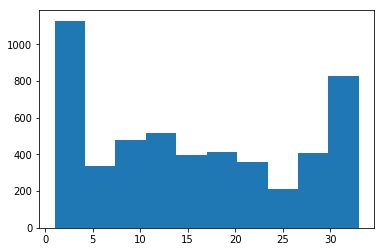

In [32]:
plt.hist(y_noZero)

In [33]:
print(y_noZero.shape, X_noZero.shape)

(5074,) (5074, 100, 117)


## Test Set with Subj 1 and 9

In [0]:

col = []

timeSteps = 100

for individual_df in ls_of_dfs_noZero_holdout:
    for i in range((len(vars()[individual_df]) + timeSteps - 1) // timeSteps ) :
        col.append(vars()[individual_df][i * timeSteps:(i + 1) * timeSteps].to_numpy())

### Sebset the list for the val set

In [0]:
ls_of_dfs_noZero_val = []
ls_of_dfs_noZero_val = ls_of_dfs_noZero_holdout[66:]

In [36]:
len(ls_of_dfs_noZero_val)

66

In [37]:
ls_of_dfs_noZero_holdout = ls_of_dfs_noZero_holdout[:66]
len(ls_of_dfs_noZero_holdout)

66

In [38]:
ls_of_dfs_noZero_holdout[-1]

'df_noZeroClass_idealSubj9_33'

### Back to test set creation

In [0]:
ls_timeSteps_master_noZero_holdout = [arr for arr in col if arr.shape == (100, 120)]

In [40]:
len(ls_timeSteps_master_noZero_holdout)

1792

In [41]:
ls_timeSteps_master_noZero_holdout[800][0,-1]

31.0

In [0]:
timeStepsStack_noZero_holdout = []
timeStepsStack_noZero_holdout = np.stack(ls_timeSteps_master_noZero_holdout)

In [43]:
timeStepsStack_noZero_holdout.shape

(1792, 100, 120)

In [0]:
y_noZero_holdout = timeStepsStack_noZero_holdout[:,:,-1]
X_noZero_holdout = timeStepsStack_noZero_holdout[:,:,2:-1]

In [0]:
y_noZero_holdout = y_noZero_holdout[:,0]

(array([367., 113., 144., 168., 134., 141., 127.,  63., 132., 403.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

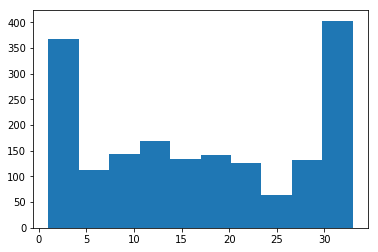

In [46]:
plt.hist(y_noZero_holdout)

In [47]:
print(y_noZero_holdout.shape, X_noZero_holdout.shape)

(1792,) (1792, 100, 117)


In [0]:
y_noZero = y_noZero.astype(int) - np.min(y_noZero)
y_noZero_holdout = y_noZero_holdout.astype(int) - np.min(y_noZero_holdout)

In [49]:
np.unique(y_noZero)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32.])

## Val set for subj 10, 14

In [50]:
ls_of_dfs_noZero_val

['df_noZeroClass_idealSubj10_1',
 'df_noZeroClass_idealSubj10_2',
 'df_noZeroClass_idealSubj10_3',
 'df_noZeroClass_idealSubj10_4',
 'df_noZeroClass_idealSubj10_5',
 'df_noZeroClass_idealSubj10_6',
 'df_noZeroClass_idealSubj10_7',
 'df_noZeroClass_idealSubj10_8',
 'df_noZeroClass_idealSubj10_9',
 'df_noZeroClass_idealSubj10_10',
 'df_noZeroClass_idealSubj10_11',
 'df_noZeroClass_idealSubj10_12',
 'df_noZeroClass_idealSubj10_13',
 'df_noZeroClass_idealSubj10_14',
 'df_noZeroClass_idealSubj10_15',
 'df_noZeroClass_idealSubj10_16',
 'df_noZeroClass_idealSubj10_17',
 'df_noZeroClass_idealSubj10_18',
 'df_noZeroClass_idealSubj10_19',
 'df_noZeroClass_idealSubj10_20',
 'df_noZeroClass_idealSubj10_21',
 'df_noZeroClass_idealSubj10_22',
 'df_noZeroClass_idealSubj10_23',
 'df_noZeroClass_idealSubj10_24',
 'df_noZeroClass_idealSubj10_25',
 'df_noZeroClass_idealSubj10_26',
 'df_noZeroClass_idealSubj10_27',
 'df_noZeroClass_idealSubj10_28',
 'df_noZeroClass_idealSubj10_29',
 'df_noZeroClass_idealS

In [0]:

col = []

timeSteps = 100

for individual_df in ls_of_dfs_noZero_val:
    for i in range((len(vars()[individual_df]) + timeSteps - 1) // timeSteps ) :
        col.append(vars()[individual_df][i * timeSteps:(i + 1) * timeSteps].to_numpy())

In [0]:
ls_timeSteps_master_noZero_val = [arr for arr in col if arr.shape == (100, 120)]

In [53]:
len(ls_timeSteps_master_noZero_val)

894

In [54]:
ls_timeSteps_master_noZero_val[800][0,-1]

29.0

In [0]:
timeStepsStack_noZero_val = []
timeStepsStack_noZero_val = np.stack(ls_timeSteps_master_noZero_val)

In [56]:
timeStepsStack_noZero_val.shape

(894, 100, 120)

In [0]:
y_noZero_val = timeStepsStack_noZero_val[:,:,-1]
X_noZero_val = timeStepsStack_noZero_val[:,:,2:-1]

In [0]:
y_noZero_val = y_noZero_val[:,0]

(array([180.,  57.,  74.,  84.,  66.,  69.,  64.,  31.,  65., 204.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

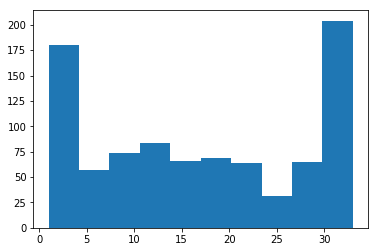

In [59]:
plt.hist(y_noZero_val)

In [60]:
print(y_noZero_val.shape, X_noZero_val.shape)

(894,) (894, 100, 117)


In [0]:
y_noZero_val = y_noZero_val.astype(int) - np.min(y_noZero_val)

In [62]:
np.unique(y_noZero_val)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32.])

## LSTM (All Sensors) Training never sees val subjects or test subjects

In [0]:
def top_3_acc(y_true, y_pred):
  return keras.metrics.sparse_top_k_categorical_accuracy(y_true, y_pred, k=3)

In [0]:
dropout = 0.2

In [65]:
# design network
model_holdout = Sequential()
#spatialdropout2d
model_holdout.add(LSTM(50, input_shape=(X_noZero.shape[1],X_noZero.shape[2]), dropout_W=dropout, dropout_U=dropout))
#dropout
model_holdout.add(Dense(len(np.unique(y_noZero))))
model_holdout.add(Activation('softmax'))
model_holdout.compile(loss=losses.sparse_categorical_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy', 
                       top_3_acc
                      ]
                     )

model_holdout.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(100, 117), dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                33600     
_________________________________________________________________
dense_1 (Dense)              (None, 33)                1683      
_________________________________________________________________
activation_1 (Activation)    (None, 33)                0         
Total params: 35,283
Trainable params: 35,283
Non-trainable params: 0
_________________________________________________________________


In [66]:
# fit network
print('Train...')
model_holdout.fit(X_noZero, y_noZero, epochs=100, 
                  validation_data=(X_noZero_val,y_noZero_val), 
                  callbacks=[
                      keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                      keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1)]
                 )

# evaluate the model
score, accuracy_test, top_3_acc = model_holdout.evaluate(X_noZero_holdout, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)


Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5074 samples, validate on 894 samples
Epoch 1/100
5074/5074 [==============================] - 41s 8ms/step - loss: 2.9921 - acc: 0.2194 - top_3_acc: 0.3819 - val_loss: 2.0649 - val_acc: 0.4732 - val_top_3_acc: 0.7058
Epoch 2/100
5074/5074 [==============================] - 36s 7ms/step - loss: 1.9300 - acc: 0.4939 - top_3_acc: 0.7420 - val_loss: 1.2218 - val_acc: 0.6622 - val_top_3_acc: 0.8714
Epoch 3/100
5074/5074 [==============================] - 37s 7ms/step - loss: 1.3210 - acc: 0.6626 - top_3_acc: 0.8754 - val_loss: 0.8253 - val_acc: 0.7528 - val_top_3_acc: 0.9653
Epoch 4/100
5074/5074 [==============================] - 37s 7ms/step - loss: 0.9509 - acc: 0.7603 - top_3_acc: 0.9397 - val_loss: 0.5819 - val_acc: 0.8378 - val_top_3_acc: 0.9877
Epoch 5/100
5074/5074 [==============================] - 37s 7ms/step - loss: 0.7112 - acc: 0.8222 - top_3_acc: 0.9675 - val_loss:

In [67]:
model_holdout.metrics_names

['loss', 'acc', 'top_3_acc']

In [1]:
X_noZero.shape

NameError: ignored

In [68]:
df_noZeroClass_idealSubj10_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
5836,116,740000.0,-11.4970,2.9516,2.2309,0.037920,-0.110540,0.38946,0.42339,-0.082112,-0.26399,-0.77371,-0.052191,-0.62329,-0.10080,-11.3010,0.47337,2.52900,-0.177900,0.134510,0.27822,0.66082,0.10473,-0.10982,-0.64426,-0.38774,-0.47952,0.45238,-10.2760,0.24500,1.0943,-0.46793,0.252810,-0.093065,0.69691,0.061548,-0.19576,-0.36338,-0.60313,-0.32046,...,-10.2590,2.2585,-2.76120,0.984430,2.01590,0.362460,0.59198,0.007501,-0.085054,-0.75778,-0.070623,-0.64582,0.060886,-12.478,3.1355,2.75580,-0.38356,-2.0240,0.186220,0.60839,-0.053686,0.067954,-0.65599,0.093792,-0.73755,-0.13002,-14.9680,-1.69440,0.88089,-2.3970,1.7986,0.69167,0.58387,-0.10244,0.40753,-0.33477,0.41259,-0.76868,-0.35613,1
5837,116,760000.0,-10.0230,2.7700,2.0099,-0.003888,-0.141800,0.53663,0.40833,-0.079624,-0.26216,-0.77403,-0.055590,-0.62191,-0.10498,-10.0490,0.55811,2.05550,-0.122320,0.045556,0.18674,0.66083,0.10255,-0.10800,-0.64537,-0.38808,-0.47962,0.45040,-9.3954,-0.28175,1.0770,-0.47638,0.310420,-0.080098,0.69756,0.063860,-0.19069,-0.36474,-0.60314,-0.32509,...,-11.9950,2.7167,-2.28950,0.660460,1.82650,0.264880,0.59536,0.001354,-0.067044,-0.74555,-0.078224,-0.65896,0.061700,-11.441,3.9133,0.34877,-0.74745,-2.2296,0.210120,0.60912,-0.059211,0.040573,-0.67137,0.094079,-0.72188,-0.13891,-11.0210,0.27247,-6.66300,-1.7635,2.5514,1.14990,0.56569,-0.13539,0.42753,-0.30361,0.41850,-0.77527,-0.36281,1
5838,116,780000.0,-8.6708,2.7707,1.7212,0.069982,-0.119740,0.68120,0.39439,-0.079123,-0.25931,-0.77399,-0.060421,-0.62067,-0.10982,-8.8858,0.47182,1.65470,-0.084771,-0.091129,0.11522,0.66056,0.10405,-0.10890,-0.64663,-0.38770,-0.47897,0.44961,-9.3050,-0.73750,1.3793,-0.44804,0.279710,-0.085808,0.69886,0.068302,-0.18490,-0.36598,-0.60300,-0.32947,...,-11.7230,3.0999,-1.42220,0.099562,1.36040,0.142630,0.59765,-0.000220,-0.050449,-0.73653,-0.080758,-0.66886,0.060239,-10.751,3.6325,-1.89120,-1.31200,-2.2390,0.029446,0.60635,-0.062084,0.011417,-0.68605,0.099575,-0.70478,-0.15071,-10.6910,-1.06800,-6.89830,-1.0824,2.4124,1.14510,0.53805,-0.16083,0.44459,-0.27610,0.42146,-0.78316,-0.36441,1
5839,116,800000.0,-8.1259,3.0960,1.4306,0.090034,-0.071039,0.82534,0.37872,-0.078600,-0.25510,-0.77343,-0.066268,-0.61970,-0.11570,-8.1736,0.32108,1.05020,-0.089449,-0.136760,0.11555,0.66055,0.10405,-0.10943,-0.64815,-0.38709,-0.47802,0.44895,-9.4604,-1.08770,1.4235,-0.33216,0.165650,-0.099488,0.69924,0.069859,-0.18222,-0.36681,-0.60254,-0.33276,...,-9.8341,3.2033,-0.57505,-0.570590,1.07950,0.042627,0.60012,-0.002524,-0.038903,-0.72974,-0.077479,-0.67708,0.055233,-10.767,3.0954,-4.17700,-1.77930,-2.1165,-0.266440,0.60300,-0.061550,-0.017124,-0.69945,0.110140,-0.68700,-0.16329,-10.5590,0.57260,-4.34940,-1.2500,1.9504,0.95280,0.51460,-0.18382,0.45984,-0.25201,0.42442,-0.78777,-0.36849,1
5840,116,820000.0,-8.4348,3.3786,1.0930,-0.043007,-0.064941,0.87918,0.36666,-0.081514,-0.24832,-0.77281,-0.071385,-0.61854,-0.12279,-8.4060,0.16542,0.79453,-0.123990,-0.173620,0.16252,0.65894,0.10272,-0.11156,-0.65017,-0.38631,-0.47682,0.44799,-9.7145,-1.14540,1.3003,-0.17856,0.013982,-0.099001,0.69868,0.072812,-0.18055,-0.36721,-0.60166,-0.33454,...,-9.3814,2.0499,-0.34853,-0.894930,0.92305,0.004886,0.60180,-0.004196,-0.029449,-0.72412,-0.071496,-0.68425,0.048427,-11.331,2.1859,-3.92610,-2.07790,-1.6963,-0.509020,0.59933,-0.057372,-0.040731,-0.70940,0.125400,-0.67089,-0.17588,-9.2047,-1.80250,0.95296,-2.0334,1.1327,0.23813,0.49846,-0.20836,0.46286,-0.23351,0.43169,-0.78395,-0.38018,1


In [69]:
X_noZero[0]

array([[-7.491   , -0.5325  ,  3.94    , ...,  0.096192,  0.68424 ,
        -0.12302 ],
       [-7.832   , -0.17935 ,  2.4496  , ...,  0.093992,  0.68825 ,
        -0.12868 ],
       [-8.2111  , -1.2997  ,  2.8113  , ...,  0.092368,  0.69261 ,
        -0.13447 ],
       ...,
       [-8.3325  ,  2.0181  ,  5.4786  , ...,  0.015649,  0.7887  ,
        -0.10336 ],
       [-8.599   ,  2.7118  ,  5.3638  , ...,  0.01322 ,  0.79685 ,
        -0.10166 ],
       [-8.7294  ,  3.305   ,  5.2517  , ...,  0.010217,  0.80542 ,
        -0.099513]])

In [0]:
X_noZero_LC = X_noZero[:,:,104:]
X_noZero_RLA = X_noZero[:,:,:13]
X_noZero_LC_RLA = np.concatenate((X_noZero_LC,X_noZero_RLA),axis=2)

In [71]:
X_noZero_LC_RLA.shape

(5074, 100, 26)

In [0]:
X_noZero_holdout_LC = X_noZero_holdout[:,:,104:]
X_noZero_holdout_RLA = X_noZero_holdout[:,:,:13]
X_noZero_holdout_LC_RLA = np.concatenate((X_noZero_holdout_LC,X_noZero_holdout_RLA), axis=2)

In [73]:
X_noZero_holdout_LC_RLA.shape

(1792, 100, 26)

In [0]:
X_noZero_val_LC = X_noZero_val[:,:,104:]
X_noZero_val_RLA = X_noZero_val[:,:,:13]
X_noZero_val_LC_RLA = np.concatenate((X_noZero_val_LC,X_noZero_val_RLA), axis=2)

In [75]:
print(X_noZero_val_LC_RLA.shape, y_noZero_val.shape)

(894, 100, 26) (894,)


In [78]:
# design network
model_holdout_LC = Sequential()
#spatialdropout2d
model_holdout_LC.add(LSTM(50, input_shape=(X_noZero_LC_RLA.shape[1],X_noZero_LC_RLA.shape[2]), dropout_W=0.2, dropout_U=0.2))
#dropout
model_holdout_LC.add(Dense(len(np.unique(y_noZero))))
model_holdout_LC.add(Activation('softmax'))
model_holdout_LC.compile(loss=losses.sparse_categorical_crossentropy, 
                         optimizer='adam', 
                         metrics=['accuracy', 
                                  top_3_acc])

model_holdout_LC.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(100, 26), dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                15400     
_________________________________________________________________
dense_3 (Dense)              (None, 33)                1683      
_________________________________________________________________
activation_3 (Activation)    (None, 33)                0         
Total params: 17,083
Trainable params: 17,083
Non-trainable params: 0
_________________________________________________________________


In [79]:
  # fit network
print('Train...')
model_holdout_LC.fit(X_noZero_LC_RLA, y_noZero, epochs=100, 
                     validation_data= (X_noZero_val_LC_RLA, y_noZero_val), 
                     callbacks=[
                         keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                         keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1)]
                    )

# evaluate the model
score, accuracy_test, top_3_acc = model_holdout_LC.evaluate(X_noZero_holdout_LC_RLA, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)

Train...
Train on 5074 samples, validate on 894 samples
Epoch 1/100
5074/5074 [==============================] - 39s 8ms/step - loss: 3.1752 - acc: 0.1535 - top_3_acc: 0.3017 - val_loss: 2.5514 - val_acc: 0.3020 - val_top_3_acc: 0.5962
Epoch 2/100
5074/5074 [==============================] - 39s 8ms/step - loss: 2.4524 - acc: 0.3207 - top_3_acc: 0.5631 - val_loss: 1.7859 - val_acc: 0.4855 - val_top_3_acc: 0.7785
Epoch 3/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.9527 - acc: 0.4316 - top_3_acc: 0.7132 - val_loss: 1.4186 - val_acc: 0.5358 - val_top_3_acc: 0.8300
Epoch 4/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.6783 - acc: 0.5037 - top_3_acc: 0.7759 - val_loss: 1.2252 - val_acc: 0.5962 - val_top_3_acc: 0.8848
Epoch 5/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.4991 - acc: 0.5566 - top_3_acc: 0.8132 - val_loss: 1.1226 - val_acc: 0.6230 - val_top_3_acc: 0.8781
Epoch 6/100
5074/5074 [=====================

### both feet sensors and wrist

In [0]:
# for sensor in sensor_ls:
#   X_noZero[:,:,i:j]

In [0]:
X_noZero_RC = X_noZero[:,:,65:78]
X_noZero_val_RC = X_noZero_val[:,:,65:78]
X_noZero_holdout_RC = X_noZero_holdout[:,:,65:78]

In [82]:
X_noZero_RC_LC_RLA = np.concatenate((X_noZero_LC, X_noZero_RLA, X_noZero_RC), axis=2)
X_noZero_val_RC_LC_RLA = np.concatenate((X_noZero_val_LC, X_noZero_val_RLA, X_noZero_val_RC), axis=2)
X_noZero_holdout_RC_LC_RLA = np.concatenate((X_noZero_holdout_LC, X_noZero_holdout_RLA, X_noZero_holdout_RC), axis=2)

print(X_noZero_RC_LC_RLA.shape, X_noZero_val_RC_LC_RLA.shape, X_noZero_holdout_RC_LC_RLA.shape)

(5074, 100, 39) (894, 100, 39) (1792, 100, 39)


In [85]:
# design network
model_holdout_03 = Sequential()
#spatialdropout2d
model_holdout_03.add(LSTM(50, input_shape=(X_noZero_RC_LC_RLA.shape[1],X_noZero_RC_LC_RLA.shape[2]), dropout_W=0.2, dropout_U=0.2))
#dropout
model_holdout_03.add(Dense(len(np.unique(y_noZero))))
model_holdout_03.add(Activation('softmax'))
model_holdout_03.compile(loss=losses.sparse_categorical_crossentropy, 
                         optimizer='adam', 
                         metrics=['accuracy', 
                                  top_3_acc])

model_holdout_03.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(100, 39), dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                18000     
_________________________________________________________________
dense_5 (Dense)              (None, 33)                1683      
_________________________________________________________________
activation_5 (Activation)    (None, 33)                0         
Total params: 19,683
Trainable params: 19,683
Non-trainable params: 0
_________________________________________________________________


In [86]:
  # fit network
print('Train...')
model_holdout_03.fit(X_noZero_RC_LC_RLA, y_noZero, epochs=100, 
                     validation_data= (X_noZero_val_RC_LC_RLA, y_noZero_val), 
                     callbacks=[
                         keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                         keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1)]
                    )

# evaluate the model
score, accuracy_test, top_3_acc = model_holdout_03.evaluate(X_noZero_holdout_RC_LC_RLA, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)

Train...
Train on 5074 samples, validate on 894 samples
Epoch 1/100
5074/5074 [==============================] - 41s 8ms/step - loss: 3.1113 - acc: 0.1523 - top_3_acc: 0.3345 - val_loss: 2.4711 - val_acc: 0.3266 - val_top_3_acc: 0.6107
Epoch 2/100
5074/5074 [==============================] - 39s 8ms/step - loss: 2.3981 - acc: 0.3309 - top_3_acc: 0.5932 - val_loss: 1.7104 - val_acc: 0.5369 - val_top_3_acc: 0.7987
Epoch 3/100
5074/5074 [==============================] - 40s 8ms/step - loss: 1.8776 - acc: 0.4527 - top_3_acc: 0.7359 - val_loss: 1.3080 - val_acc: 0.6186 - val_top_3_acc: 0.8803
Epoch 4/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.5479 - acc: 0.5434 - top_3_acc: 0.8122 - val_loss: 1.1513 - val_acc: 0.6186 - val_top_3_acc: 0.8747
Epoch 5/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.3554 - acc: 0.5946 - top_3_acc: 0.8415 - val_loss: 0.8957 - val_acc: 0.7562 - val_top_3_acc: 0.9262
Epoch 6/100
5074/5074 [=====================

In [0]:
X_noZero_BACK = X_noZero[:,:,26:39]
X_noZero_val_BACK = X_noZero_val[:,:,26:39]
X_noZero_holdout_BACK = X_noZero_holdout[:,:,26:39]

In [88]:
X_noZero_BACK_LC_RLA = np.concatenate((X_noZero_LC, X_noZero_RLA, X_noZero_BACK), axis=2)
X_noZero_val_BACK_LC_RLA = np.concatenate((X_noZero_val_LC, X_noZero_val_RLA, X_noZero_val_BACK), axis=2)
X_noZero_holdout_BACK_LC_RLA = np.concatenate((X_noZero_holdout_LC, X_noZero_holdout_RLA, X_noZero_holdout_BACK), axis=2)

print(X_noZero_BACK_LC_RLA.shape, X_noZero_val_BACK_LC_RLA.shape, X_noZero_holdout_BACK_LC_RLA.shape)

(5074, 100, 39) (894, 100, 39) (1792, 100, 39)


In [91]:
# design network
model_holdout_04 = Sequential()
#spatialdropout2d
model_holdout_04.add(LSTM(50, input_shape=(X_noZero_BACK_LC_RLA.shape[1],X_noZero_BACK_LC_RLA.shape[2]), dropout_W=0.2, dropout_U=0.2))
#dropout
model_holdout_04.add(Dense(len(np.unique(y_noZero))))
model_holdout_04.add(Activation('softmax'))
model_holdout_04.compile(loss=losses.sparse_categorical_crossentropy, 
                         optimizer='adam', 
                         metrics=['accuracy', 
                                  top_3_acc])

model_holdout_04.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(100, 39), dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50)                18000     
_________________________________________________________________
dense_7 (Dense)              (None, 33)                1683      
_________________________________________________________________
activation_7 (Activation)    (None, 33)                0         
Total params: 19,683
Trainable params: 19,683
Non-trainable params: 0
_________________________________________________________________


In [92]:
  # fit network
print('Train...')
model_holdout_04.fit(X_noZero_BACK_LC_RLA, y_noZero, epochs=100, 
                     validation_data= (X_noZero_val_BACK_LC_RLA, y_noZero_val), 
                     callbacks=[
                         keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                         keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1)]
                    )

# evaluate the model
score, accuracy_test, top_3_acc = model_holdout_04.evaluate(X_noZero_holdout_BACK_LC_RLA, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)

Train...
Train on 5074 samples, validate on 894 samples
Epoch 1/100
5074/5074 [==============================] - 41s 8ms/step - loss: 3.1428 - acc: 0.1657 - top_3_acc: 0.3153 - val_loss: 2.4655 - val_acc: 0.3456 - val_top_3_acc: 0.6029
Epoch 2/100
5074/5074 [==============================] - 39s 8ms/step - loss: 2.2779 - acc: 0.3922 - top_3_acc: 0.6291 - val_loss: 1.6538 - val_acc: 0.5056 - val_top_3_acc: 0.8076
Epoch 3/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.7407 - acc: 0.5173 - top_3_acc: 0.7714 - val_loss: 1.2608 - val_acc: 0.6286 - val_top_3_acc: 0.8736
Epoch 4/100
5074/5074 [==============================] - 39s 8ms/step - loss: 1.3951 - acc: 0.6027 - top_3_acc: 0.8461 - val_loss: 1.0531 - val_acc: 0.7125 - val_top_3_acc: 0.9049
Epoch 5/100
5074/5074 [==============================] - 38s 8ms/step - loss: 1.1783 - acc: 0.6596 - top_3_acc: 0.8869 - val_loss: 0.8378 - val_acc: 0.7327 - val_top_3_acc: 0.9418
Epoch 6/100
5074/5074 [=====================

In [94]:
# design network
model_holdout_RA = Sequential()
#spatialdropout2d
model_holdout_RA.add(LSTM(50, input_shape=(X_noZero_RLA.shape[1],X_noZero_RLA.shape[2]), dropout_W=0.2, dropout_U=0.2))
#dropout
model_holdout_RA.add(Dense(len(np.unique(y_noZero))))
model_holdout_RA.add(Activation('softmax'))
model_holdout_RA.compile(loss=losses.sparse_categorical_crossentropy, 
                         optimizer='adam', 
                         metrics=['accuracy', 
                                  top_3_acc])

model_holdout_RA.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(100, 13), dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                12800     
_________________________________________________________________
dense_8 (Dense)              (None, 33)                1683      
_________________________________________________________________
activation_8 (Activation)    (None, 33)                0         
Total params: 14,483
Trainable params: 14,483
Non-trainable params: 0
_________________________________________________________________


In [1]:
  # fit network
print('Train...')
model_holdout_RA.fit(X_noZero_RLA, y_noZero, epochs=100, 
                     validation_data= (X_noZero_val_RLA, y_noZero_val), 
                     callbacks=[
                         keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                         keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1)]
                    )

# evaluate the model
score, accuracy_test, top_3_acc = model_holdout_RA.evaluate(X_noZero_holdout_RLA, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)

Train...


NameError: ignored

In [96]:
# evaluate the model
score, accuracy_test, top_3_acc = model_holdout_RA.evaluate(X_noZero_holdout_RLA, y_noZero_holdout)

print('Test score:', score)
print('Test accuracy:', accuracy_test)
print('Test top 3 accuracy:', top_3_acc)

1792/1792 [==============================] - 5s 3ms/step
Test score: 0.8893678493332118
Test accuracy: 0.7003348214285714
Test top 3 accuracy: 0.9202008928571429


## Classification Reports

In [0]:
from sklearn import metrics

In [0]:
def print_metrics(model,X_set,y_set):
    y_model_pred = model.predict_classes(X_set)
    print(metrics.classification_report(y_set, y_model_pred))
    print(metrics.confusion_matrix(y_set, y_model_pred))

In [99]:
print_metrics(model_holdout_RA,X_noZero_holdout_RLA,y_noZero_holdout)

              precision    recall  f1-score   support

         0.0       0.69      0.91      0.79       144
         1.0       0.61      0.85      0.71        98
         2.0       0.82      0.47      0.59       105
         3.0       0.33      0.10      0.15        20
         4.0       0.23      0.19      0.21        36
         5.0       0.45      0.76      0.57        38
         6.0       0.90      0.92      0.91        39
         7.0       0.77      1.00      0.87        20
         8.0       0.88      0.90      0.89        68
         9.0       0.86      1.00      0.93        56
        10.0       0.72      0.64      0.68        59
        11.0       0.64      0.45      0.53        51
        12.0       0.90      0.60      0.72        58
        13.0       0.88      0.47      0.61        49
        14.0       0.75      0.14      0.24        42
        15.0       0.79      0.44      0.57        43
        16.0       0.56      0.18      0.27        28
        17.0       0.86    

In [72]:
print_metrics(model_holdout,X_noZero_holdout,y_noZero_holdout)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       144
         1.0       0.78      1.00      0.88        98
         2.0       1.00      0.75      0.86       105
         3.0       1.00      0.90      0.95        20
         4.0       0.97      0.81      0.88        36
         5.0       0.83      1.00      0.90        38
         6.0       1.00      0.90      0.95        39
         7.0       0.91      1.00      0.95        20
         8.0       1.00      1.00      1.00        68
         9.0       0.98      1.00      0.99        56
        10.0       0.95      1.00      0.98        59
        11.0       0.93      1.00      0.96        51
        12.0       1.00      0.97      0.98        58
        13.0       0.96      0.88      0.91        49
        14.0       1.00      0.90      0.95        42
        15.0       1.00      1.00      1.00        43
        16.0       1.00      0.89      0.94        28
        17.0       1.00    

In [103]:
#Wrist and shoe sensor
print_metrics(model_holdout_LC,X_noZero_holdout_LC_RLA, y_noZero_holdout)

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       144
         1.0       0.75      0.99      0.85        98
         2.0       0.96      0.77      0.86       105
         3.0       0.94      0.80      0.86        20
         4.0       0.85      0.61      0.71        36
         5.0       0.71      0.95      0.81        38
         6.0       0.97      1.00      0.99        39
         7.0       1.00      0.90      0.95        20
         8.0       1.00      1.00      1.00        68
         9.0       0.95      1.00      0.97        56
        10.0       0.60      0.93      0.73        59
        11.0       0.88      0.98      0.93        51
        12.0       0.98      0.78      0.87        58
        13.0       0.89      0.69      0.78        49
        14.0       0.75      0.71      0.73        42
        15.0       0.96      0.51      0.67        43
        16.0       0.90      0.64      0.75        28
        17.0       0.95    

# Visualizations

In [123]:
!pwd

/content


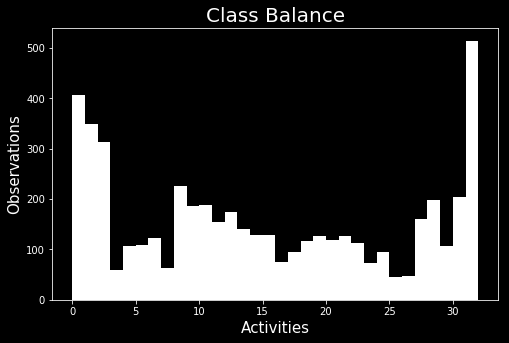

In [64]:
from matplotlib.pyplot import figure
# Style
plt.figure(figsize=(8,5))
plt.style.use('dark_background')
# Plot hist of activities
plt.hist(y_noZero, color="white",bins= np.unique(y_noZero).astype(int))
# Set the title and labels
plt.title('Class Balance',fontsize=20)
plt.xlabel('Activities',fontsize=15)
plt.ylabel('Observations',fontsize=15)

plt.savefig("act_hist.svg")


In [117]:
np.unique(y_noZero).astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [141]:
X_noZero.shape

(5074, 100, 117)

In [139]:
model_holdout_LC.count_params()

17083

In [90]:
sensor_plt = df_noZeroClass_idealSubj10_31.reset_index(drop=False).iloc[46:146]
sensor_plt

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
46,85549,1711,0.0,24.74100,-8.560000,6.10870,0.561530,1.331700,-1.347700,-0.010015,-0.249820,-0.70986,0.84962,0.26484,-0.234220,-0.39134,-5.36920,18.81000,-6.76800,-4.236600,-1.51480,-1.61920,0.34437,-0.22114,-0.62363,-0.130840,0.42155,-0.14405,-0.88568,-10.6870,1.675700,-2.04050,0.044361,-0.757330,-0.008845,0.70347,-0.35569,0.029938,-0.46899,0.49892,...,8.29450,-2.091800,3.6153,-0.388660,-0.96809,0.132290,-0.077879,0.22956,-0.72670,0.66156,0.018832,-0.052516,-0.74781,6.192600,2.644400,6.46350,0.174470,-0.66027,0.257120,-0.028055,0.107330,-0.77181,0.73580,0.092565,-0.108130,-0.66207,-3.73810,-1.627300,6.567100,-0.199350,1.81940,0.90917,0.38341,0.52808,-0.433930,0.67265,0.103480,0.34422,-0.64680,31
47,85550,1711,20000.0,22.97400,-0.388160,14.04000,1.079400,0.792330,-1.013400,0.012936,-0.263140,-0.70650,0.84454,0.27941,-0.228990,-0.39528,-1.40860,15.70600,-4.82310,-2.990700,0.11546,-0.54721,0.34365,-0.17050,-0.63997,-0.122850,0.42709,-0.11538,-0.88836,-9.9786,-0.356980,-2.89860,-0.070378,-0.737220,0.013259,0.70322,-0.35753,0.020624,-0.47243,0.49548,...,2.82130,1.877600,6.1848,0.117720,-0.50367,0.324400,-0.086306,0.22870,-0.72462,0.66369,0.015649,-0.056780,-0.74569,1.176600,2.872200,9.72130,-0.347660,-0.71962,0.296180,-0.036611,0.111540,-0.76967,0.73729,0.084802,-0.111360,-0.66091,-6.18080,-2.038600,6.409600,-0.686900,1.83230,0.82823,0.40647,0.52710,-0.414340,0.67226,0.113620,0.35998,-0.63685,31
48,85551,1711,40000.0,18.46800,0.925600,16.18500,1.350400,0.265080,-0.196350,0.017772,-0.278970,-0.70001,0.84073,0.29163,-0.231840,-0.39290,-0.55692,11.19000,-1.46960,-1.159100,1.25360,0.62442,0.36016,-0.14710,-0.63496,-0.110530,0.43896,-0.10999,-0.88487,-9.4583,-0.514950,-3.08610,0.024487,-0.700670,-0.153170,0.70264,-0.35337,0.010433,-0.47694,0.49264,...,-1.26950,5.042500,9.0175,0.535560,-0.62466,0.458440,-0.091743,0.22679,-0.72284,0.66664,0.014066,-0.065194,-0.74239,-1.446700,3.269300,10.48800,-0.673460,-1.09570,0.268950,-0.050089,0.119910,-0.76303,0.73840,0.071960,-0.115370,-0.66052,-8.30670,-3.024100,6.607400,-0.833550,1.81270,0.81113,0.43196,0.52303,-0.391910,0.67170,0.122520,0.37641,-0.62620,31
49,85552,1711,60000.0,14.33700,2.346100,13.99700,0.598450,0.061337,0.601180,0.016205,-0.293570,-0.69342,0.84146,0.29547,-0.235420,-0.38628,-4.85160,9.68350,1.66880,0.184130,1.12360,1.76090,0.37098,-0.15822,-0.62654,-0.094498,0.44668,-0.12059,-0.88148,-8.8867,0.744600,-2.69920,0.117470,-0.720720,-0.194860,0.70397,-0.35039,0.002045,-0.48222,0.48942,...,-2.11470,4.954200,10.2040,0.502860,-0.97483,0.246390,-0.104210,0.21982,-0.72312,0.66772,0.009995,-0.075447,-0.74051,-1.387800,3.175800,10.64800,-0.540200,-1.21600,0.207840,-0.069634,0.129480,-0.75991,0.73870,0.059577,-0.120890,-0.66042,-8.86190,-3.145400,7.175200,-0.594350,1.80780,1.00170,0.45542,0.51827,-0.367890,0.67175,0.133660,0.39089,-0.61489,31
50,85553,1711,80000.0,12.84600,4.734400,11.01000,-0.627750,-0.099260,1.112700,0.010751,-0.292220,-0.69333,0.84759,0.28631,-0.237500,-0.37843,-8.93460,10.09500,4.28880,0.679880,0.68399,2.66640,0.37764,-0.17898,-0.62040,-0.072734,0.44875,-0.13995,-0.87963,-9.9764,1.218600,-2.39120,0.087377,-0.741550,-0.128120,0.70529,-0.34742,-0.005815,-0.48708,0.48590,...,-0.42557,2.166400,10.3820,-0.062453,-1.16080,-0.048616,-0.117900,0.21399,-0.72231,0.66644,0.000829,-0.082906,-0.74093,0.597690,2.788900,9.44160,-0.259400,-1.23650,0.127750,-0.089956,0.136060,-0.75711,0.73817,0.049031,-0.128510,-0.66044,-9.10400,-3.287900,7.162400,-0.109350,1.78480,1.14200,0.47888,0.51259,-0.347750,0.67180,0.148410,0.40188,-0.60428,31
51,85554,1711,100000.0,11.79100,8.630500,12.33600,-1.405100,-0.303110,1.425900,-0.004155,-0.273980,-0.69845,0.85612,0.26978,-0.238780,-0.37049,-10.52600,11.59600,4.74460,0.514950,0.34458,3.33820,0.371

In [203]:
y_sensor = []
y_sensor.append([2])
y_sensor.append([x for x in range(2,4)])
y_sensor.append([x for x in range(2,5)])
y_sensor

[[2], [2, 3], [2, 3, 4]]

<Figure size 720x504 with 0 Axes>

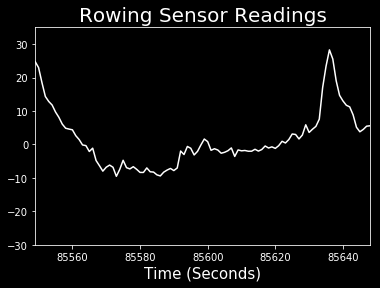

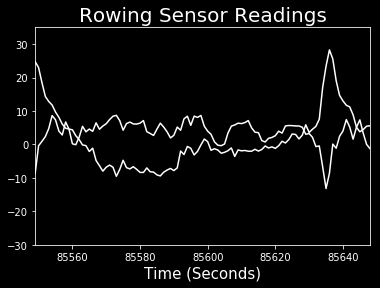

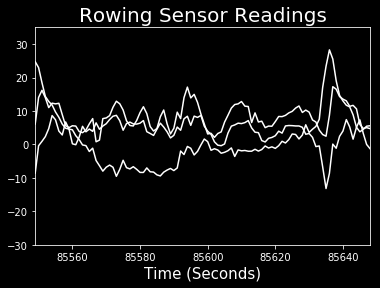

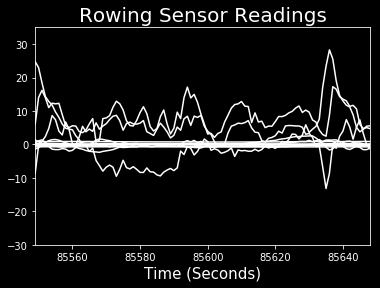

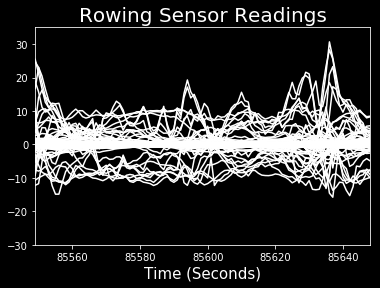

In [216]:
# Style
plt.figure(figsize=(10,7))
plt.style.use('dark_background')

# Y vals for different plots
y_sensor = []
y_sensor.append([2])
y_sensor.append([x for x in range(2,4)])
y_sensor.append([x for x in range(2,5)])
y_sensor.append([x for x in range(2,15)])
y_sensor.append([x for x in range(2,119)])



for idx, plot in enumerate(y_sensor):

  # Plot line graph of sensor readings
  sensor_plt.plot(x="index", y=plot, legend=False, color="w", ylim=(-30, 35),xticks=None)

  # Set the title and labels
  plt.title('Rowing Sensor Readings',fontsize=20)
  plt.xlabel('Time (Seconds)',fontsize=15)

  #save the fig
  plt.savefig(str(idx)+"rowing.svg")

In [80]:
np.array([0:2:.])

SyntaxError: ignored